In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick
from scipy.optimize import curve_fit

In [28]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical','oldVentilator']
diams = ['10um','30um','50um']

In [55]:
# cases = ['closedRoom','natural','mechanical']
# diams = ['10um','30um','50um']
# modes = ['Plane Output','Decay']
# areas = ['Whole Domain','Table','Mouth Layer']

case = 4
diam = 3
mode = 1
area = 1

datalocation = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diams[diam-1]
datalocation2 = os.getcwd() + '/Output Files/' + cases[case-3] + '/' + diams[diam-1]
foldername = datalocation + '/' + modes[mode-1] + '/' + areas[area-1] + '/'
foldername2 = datalocation2 + '/' + modes[mode-1] + '/' + areas[area-1] + '/'

In [5]:
def func(x,a,b):
    return a - a*np.exp(b*x)

def func2(x,a,b):
    return a + b*x

[ 1.21620757e-08 -2.56343034e-01]


Text(0, 0.5, 'Total Droplet Mass [kg]')

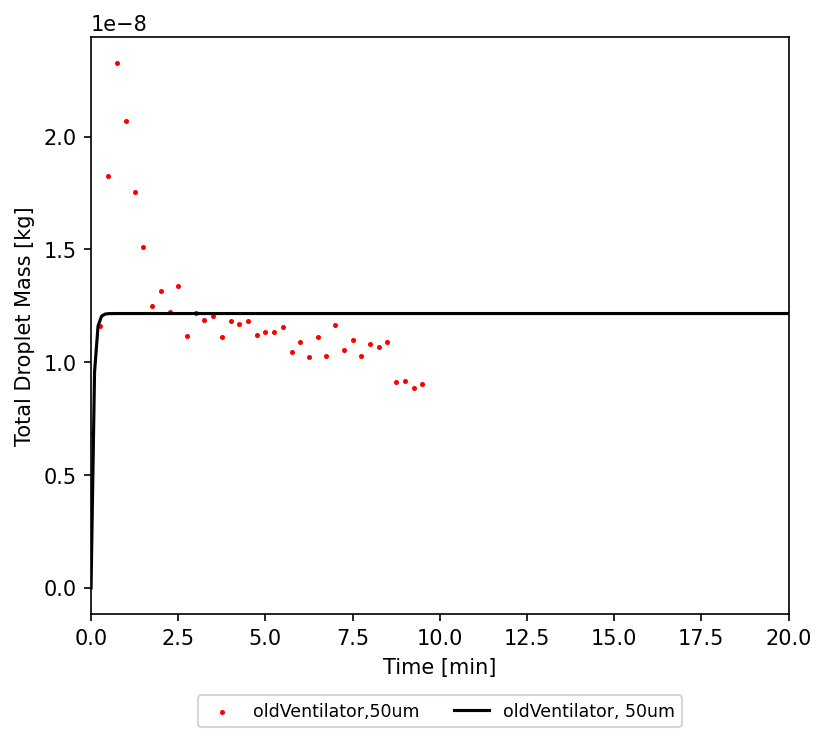

In [56]:
dpms = 1.02*np.array(pd.read_csv(foldername2 + 'dpms.csv'))[:,0]
times = np.array(pd.read_csv(foldername2 + 'times.csv'))[:,0]
times = times - times[0]
times2 = 60*np.linspace(0,20,200)

# popt, pcov = curve_fit(func2, times, np.log10(dpms), p0=[np.log10(dpms[0]/2),1])
popt,pcov = curve_fit(func, times,dpms,p0=[2e-8,-3e-3])
a = popt[0]
b = popt[1]

coeffs = np.array([a,b])
print(coeffs)
filename = foldername + 'coeffs.csv'
np.savetxt(filename,coeffs)

dpms_fit = func(times2,a,b)
# dpms_fit = func2(times2,a,b)

plt.figure(figsize=(6,5),dpi=150)
plt.scatter(times/60,dpms,label='%s,%s' %(cases[case-1],diams[diam-1]),s=2,c='r')
# plt.semilogy(times2/60,dpms_fit,'k',label='%s, %s' %(cases[case-1],diams[diam-1]))
plt.plot(times2/60,dpms_fit,'k',label='%s, %s' %(cases[case-1],diams[diam-1]))
plt.xlim([0,20])
# plt.ylim([0,8e-8])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

Text(0, 0.5, 'Total Droplet Mass [kg]')

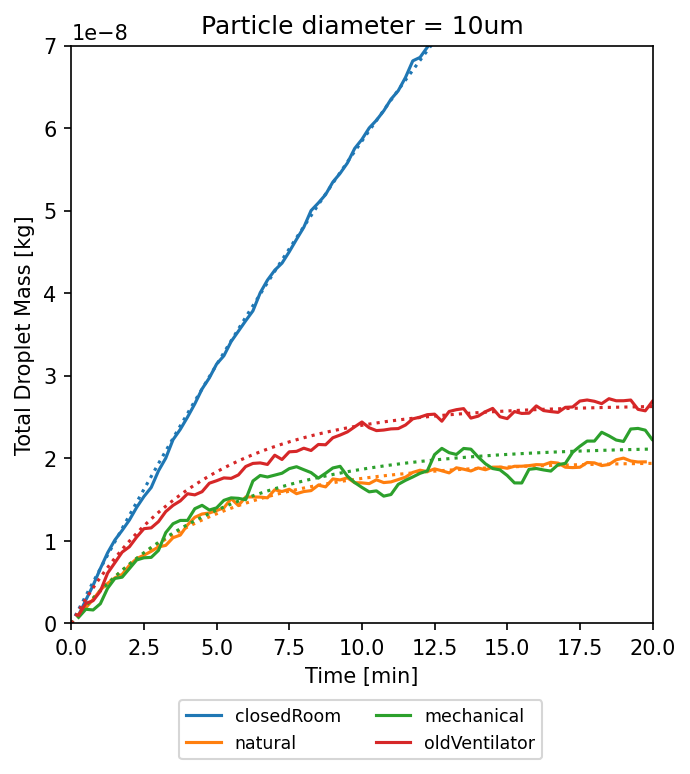

In [76]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical','oldVentilator']
casenames = ['Closed Room', 'Natural Ventilation','Mechanical Ventilation (old)', 'Mechanical Ventilation (new)']
diams = ['10um','30um','50um']

diam = 1
times = np.linspace(0,60,num=200)
c = ['C0','C1','C2','C3']

plt.figure(figsize=(5,5),dpi=150)

for i,case in enumerate(cases):
    foldername = os.getcwd() + '/Output Files/' + case + '/' + diams[diam-1] + '/Plane Output/Whole Domain/'
    coeffs = np.array(pd.read_csv(foldername + 'coeffs.csv',header=None))[:,0]
    times_data = np.array(pd.read_csv(foldername + 'times.csv', header=None))[:,0]
    dpms_data = np.array(pd.read_csv(foldername + 'dpms.csv', header=None))[:,0]

    a = coeffs[0]
    b = coeffs[1]

    smooth = -1*a * np.exp(b * times*60) + a
    
    plt.plot(times,smooth,':', color=c[i])
    # plt.plot(times_data/60, dpms_data, color=c[i], label='%s' %(casenames[i]))
    plt.plot(times_data/60, dpms_data, color=c[i], label='%s' %(case))

plt.xlim([0,20])
plt.ylim([0,7e-8])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
# plt.legend(loc='lower right', ncol=2, bbox_to_anchor=(0.975, -0.25), fontsize='small')
plt.legend(loc='lower right', ncol=2, bbox_to_anchor=(0.825, -0.25), fontsize='small')
plt.title('Particle diameter = %s' %diams[diam-1])
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

In [28]:
d_cr10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/10um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_cr10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/10um/Plane Output/Whole Domain/times.csv'))[:,0]
d_cr10 = np.insert(d_cr10,0,0)
t_cr10 = np.insert(t_cr10,0,0)

d_cr30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/30um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_cr30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/30um/Plane Output/Whole Domain/times.csv'))[:,0]
d_cr30 = np.insert(d_cr30,0,0)
t_cr30 = np.insert(t_cr30,0,0)

d_cr50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/50um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_cr50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/closedRoom/50um/Plane Output/Whole Domain/times.csv'))[:,0]
d_cr50 = np.insert(d_cr50,0,0)
t_cr50 = np.insert(t_cr50,0,0)

d_nv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/10um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_nv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/10um/Plane Output/Whole Domain/times.csv'))[:,0]
d_nv10 = np.insert(d_nv10,0,0)
t_nv10 = np.insert(t_nv10,0,0)

d_nv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/30um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_nv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/30um/Plane Output/Whole Domain/times.csv'))[:,0]
d_nv30 = np.insert(d_nv30,0,0)
t_nv30 = np.insert(t_nv30,0,0)

d_nv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/50um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_nv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/natural/50um/Plane Output/Whole Domain/times.csv'))[:,0]
d_nv50 = np.insert(d_nv50,0,0)
t_nv50 = np.insert(t_nv50,0,0)

d_mv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/10um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_mv10 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/10um/Plane Output/Whole Domain/times.csv'))[:,0]
d_mv10 = np.insert(d_mv10,0,0)
t_mv10 = np.insert(t_mv10,0,0)

d_mv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/30um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_mv30 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/30um/Plane Output/Whole Domain/times.csv'))[:,0]
d_mv30 = np.insert(d_mv30,0,0)
t_mv30 = np.insert(t_mv30,0,0)

d_mv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/50um/Plane Output/Whole Domain/dpms.csv'))[:,0]
t_mv50 = np.array(pd.read_csv(os.getcwd() + '/Output Files/mechanical/50um/Plane Output/Whole Domain/times.csv'))[:,0]
d_mv50 = np.insert(d_mv50,0,0)
t_mv50 = np.insert(t_mv50,0,0)


In [ ]:
plt.figure(figsize=(8,5),dpi=200)
plt.plot(t_cr30/60,d_cr30,label='Closed, 30$\mu m$')
plt.plot(t_nv30/60,d_nv30,label='Natural, 30$\mu m$')
plt.plot(t_mv30/60,d_mv30,label='Mechanical, 30$\mu m$')
plt.plot(t_cr50/60,d_cr50,label='Closed, 50$\mu m$')
plt.plot(t_nv50/60,d_nv50,label='Natural, 50$\mu m$')
plt.plot(t_mv50/60,d_mv50,label='Mechanical, 50$\mu m$')
plt.plot(t_cr10/60,d_cr10,label='Closed, 10$\mu m$')
plt.plot(t_nv10/60,d_nv10,label='Natural, 10$\mu m$')
plt.plot(t_mv10/60,d_mv10,label='Mechanical, 10$\mu m$')
plt.xlim([0,20])
# plt.ylim([0,8e-8])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

Text(0, 0.5, 'Total Droplet Mass [kg]')

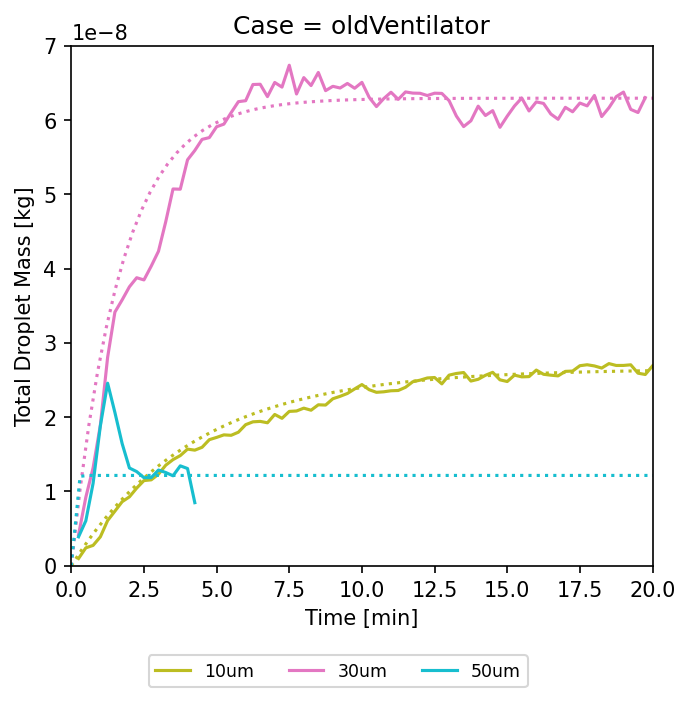

In [68]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical','oldVentilator']
diams = ['10um','30um','50um']

case = 4
times = np.linspace(0,60,num=200)
c = ['C8','C6','C9']

plt.figure(figsize=(5,4.5),dpi=150)

for i,diam in enumerate(diams):
    foldername = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diam + '/Plane Output/Whole Domain/'
    coeffs = np.array(pd.read_csv(foldername + 'coeffs.csv',header=None))[:,0]
    times_data = np.array(pd.read_csv(foldername + 'times.csv', header=None))[:,0]
    dpms_data = np.array(pd.read_csv(foldername + 'dpms.csv', header=None))[:,0]

    a = coeffs[0]
    b = coeffs[1]

    smooth = -1*a * np.exp(b * times*60) + a
    
    plt.plot(times,smooth,':', color=c[i])
    plt.plot(times_data/60, dpms_data, color=c[i], label='%s' %(diam))

plt.xlim([0,20])
plt.ylim([0,7e-8])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.legend(loc='lower right', ncol=3, bbox_to_anchor=(0.8, -0.25), fontsize='small')
plt.title('Case = %s' %cases[case-1])
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

In [ ]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical']
diams = ['10um','30um']

diam = 2
times = np.linspace(0,60,num=200)
c = ['C0','C1','C2']

plt.figure(figsize=(5,4.5),dpi=150)

for i,case in enumerate(cases):
    foldername = os.getcwd() + '/Output Files/' + case + '/' + diams[diam-1] + '/Decay/Whole Domain/'
    coeffs = np.array(pd.read_csv(foldername + 'coeffs.csv',header=None))[:,0]
    times_data = np.array(pd.read_csv(foldername + 'times.csv', header=None))[:,0]
    dpms_data = np.array(pd.read_csv(foldername + 'dpms.csv', header=None))[:,0]

    a = coeffs[0]
    b = coeffs[1]

    smooth = -1*a * np.exp(b * times*60) + a
    
    plt.plot(times,smooth,':', color=c[i])
    plt.plot(times_data/60, dpms_data, color=c[i], label='%s' %(case))

plt.xlim([0,20])
plt.ylim([0,7e-8])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.legend(loc='lower right', ncol=3, bbox_to_anchor=(0.92, -0.25), fontsize='small')
plt.title('Particle diameter = %s' %diams[diam-1])
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

Text(0, 0.5, 'Total Droplet Mass [kg]')

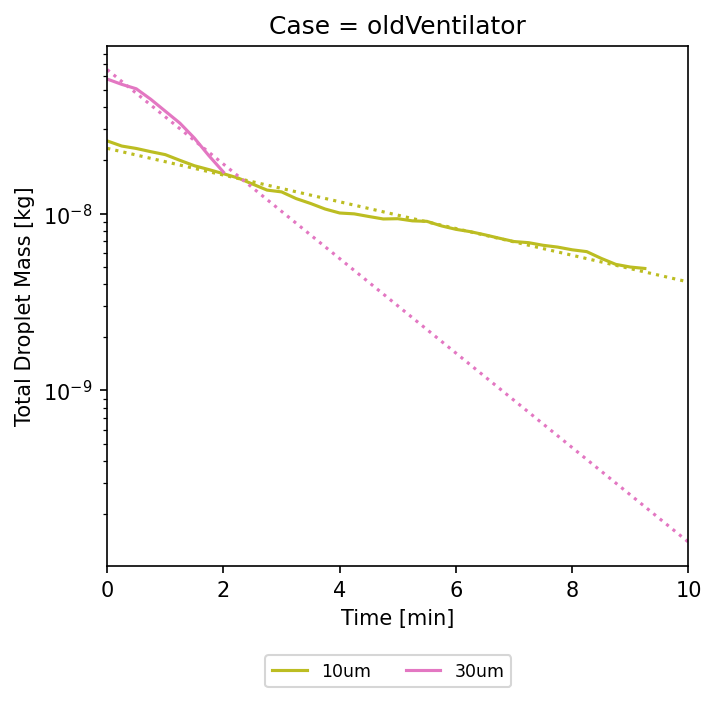

In [72]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical','oldVentilator']
diams = ['10um','30um']

case = 4
times = np.linspace(0,60,num=200)
c = ['C8','C6']

plt.figure(figsize=(5,4.5),dpi=150)

for i,diam in enumerate(diams):
    foldername = os.getcwd() + '/Output Files/' + cases[case-1] + '/' + diam + '/Decay/Whole Domain/'
    dpms = np.array(pd.read_csv(foldername + 'dpms.csv'))[:,0]
    times = np.array(pd.read_csv(foldername + 'times.csv'))[:,0]
    times = times - times[0]
    times2 = 60*np.linspace(0,10,200)

    popt, pcov = curve_fit(func2, times, np.log10(dpms), p0=[np.log10(dpms[0]/2),1])
    a = popt[0]
    b = popt[1]
    dpms_fit = func2(times2,a,b)
    
    plt.semilogy(times2/60,10**(dpms_fit),linestyle=':', color=c[i])
    plt.semilogy(times/60, dpms, color=c[i], label='%s' %(diam))

plt.xlim([0,10])
# plt.ylim([0,7e-8])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.legend(loc='lower right', ncol=3, bbox_to_anchor=(0.71, -0.25), fontsize='small')
plt.title('Case = %s' %cases[case-1])
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

Text(0, 0.5, 'Total Droplet Mass [kg]')

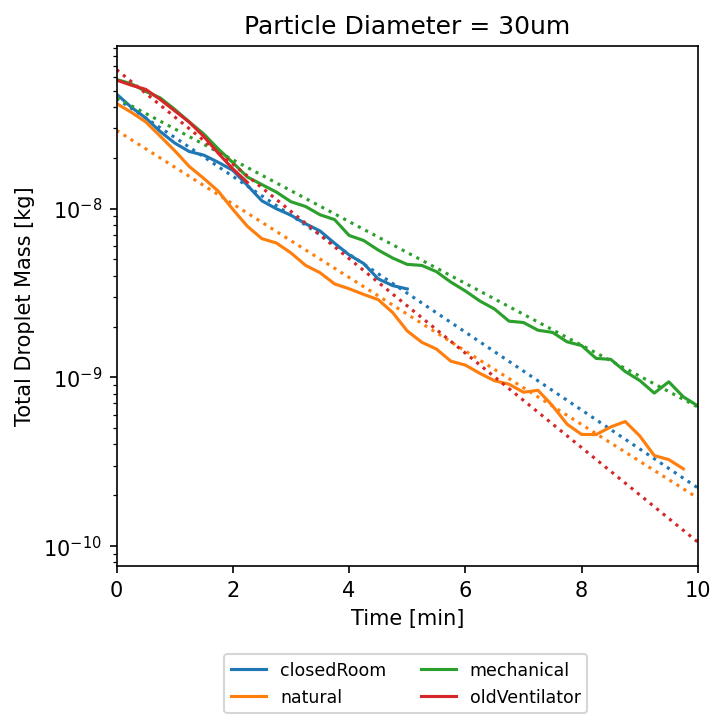

In [83]:
modes = ['Plane Output','Decay']
areas = ['Whole Domain','Table','Mouth Layer']
cases = ['closedRoom','natural','mechanical','oldVentilator']
diams = ['10um','30um']

diam = 2
times = np.linspace(0,60,num=200)
c = ['C0','C1', 'C2','C3']

plt.figure(figsize=(5,4.5),dpi=150)

for i,case in enumerate(cases):
    foldername = os.getcwd() + '/Output Files/' + case + '/' + diams[diam-1] + '/Decay/Whole Domain/'
    dpms = np.array(pd.read_csv(foldername + 'dpms.csv'))[:,0]
    times = np.array(pd.read_csv(foldername + 'times.csv'))[:,0]
    times = times - times[0]
    times2 = 60*np.linspace(0,10,200)

    popt, pcov = curve_fit(func2, times, np.log10(dpms), p0=[np.log10(dpms[0]/2),1])
    a = popt[0]
    b = popt[1]
    dpms_fit = func2(times2,a,b)
    
    plt.semilogy(times2/60,10**(dpms_fit),linestyle=':', color=c[i])
    plt.semilogy(times/60, dpms, color=c[i], label='%s' %(case))

plt.xlim([0,10])
# plt.ylim([0,7e-8])
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125),ncol=3,fontsize='small')
plt.legend(loc='lower right', ncol=2, bbox_to_anchor=(0.825, -0.3), fontsize='small')
plt.title('Particle Diameter = %s' %diams[diam-1])
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')